In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [67]:
import numpy as np

# генерация случайных величин по экспоненциональному закону распределения
variables = np.random.exponential(scale=1, size=25)

print(variables)

[0.18663776 1.09795347 0.63581028 0.28470889 0.31539874 0.3053233
 0.15777932 1.12745715 0.00747996 0.69869959 1.49608893 0.01211684
 1.10544554 0.38182286 0.35484354 0.19041983 0.95360088 1.1891154
 0.67970803 1.79149802 0.34614555 0.18601178 0.86374746 1.88195423
 0.13535322]


In [68]:
# расчитать медиану
mode = stats.mode(variables)[0]

# расчитать медиану
median = np.median(variables)

# расчитать размах
span = np.max(variables) - np.min(variables)

# расчитать коэффициент асимметрии
skewness = stats.skew(variables)

print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Размах: {span}")
print(f"Коэффициент асимметрии: {skewness}")

Мода: 0.007479955533491169
Медиана: 0.3818228629815979
Размах: 1.8744742771343736
Коэффициент асимметрии: 0.7932374730734014


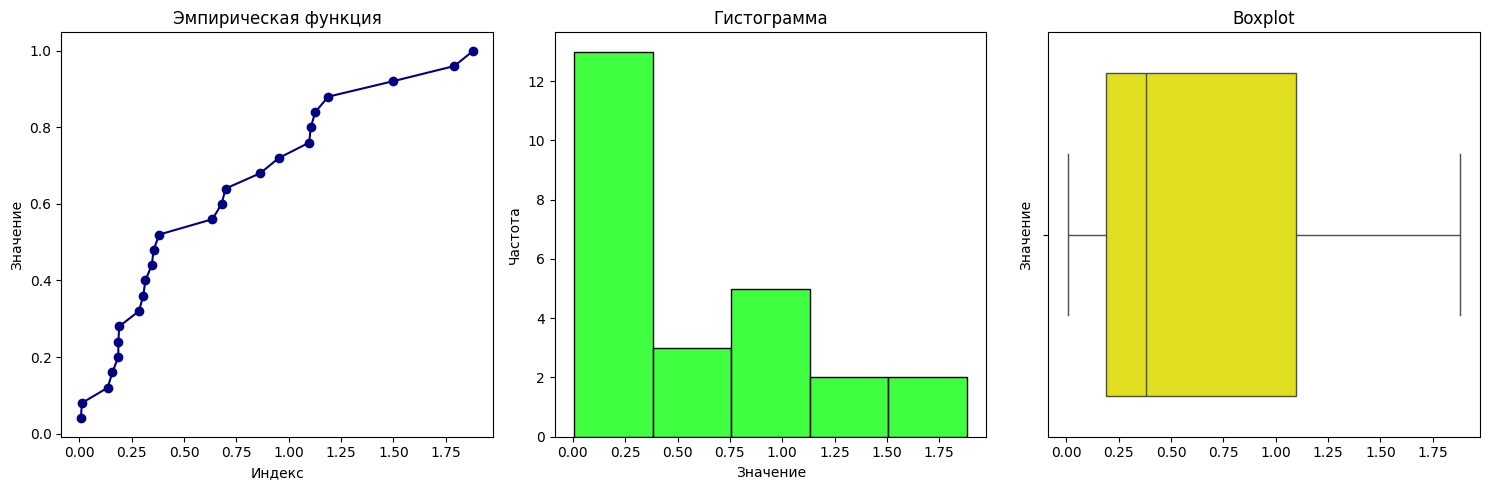

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ecdf = sm.distributions.ECDF(variables)
x = np.sort(variables)
y = ecdf(x)
axs[0].plot(x, y, marker='o', linestyle='-', color='navy')
axs[0].set_title('Эмпирическая функция')
axs[0].set_xlabel('Индекс')
axs[0].set_ylabel('Значение')

# Histogram of the sample
sns.histplot(variables, bins=5, kde=False, color='lime', ax=axs[1])
axs[1].set_title('Гистограмма')
axs[1].set_xlabel('Значение')
axs[1].set_ylabel('Частота')

# Boxplot of the sample
sns.boxplot(x=variables, color='yellow', ax=axs[2], orient='h')
axs[2].set_title('Boxplot')
axs[2].set_ylabel('Значение')

plt.tight_layout()
plt.show()

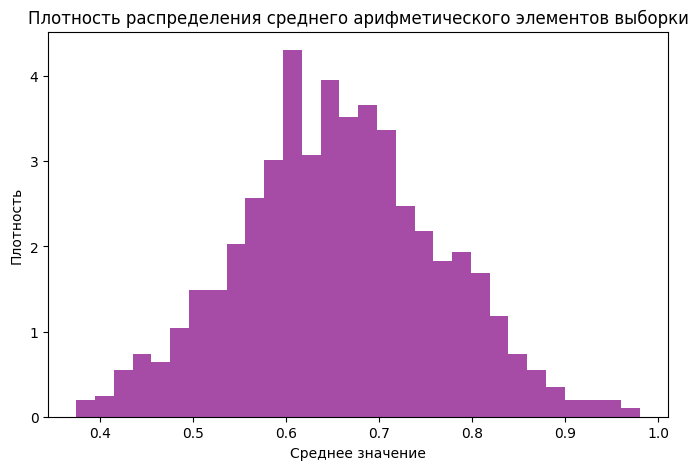

In [70]:
num_resamples = 1000

bootstrap_means = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    bootstrap_means.append(np.mean(resample))

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, density=True, color='purple', alpha=0.7)
plt.title('Плотность распределения среднего арифметического элементов выборки')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')
plt.show()

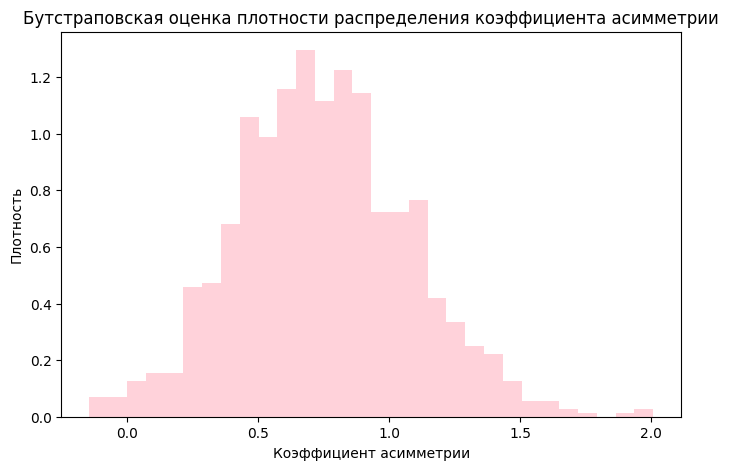

In [71]:
num_resamples = 1000

bootstrap_skewness = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    skewness = stats.skew(resample)
    bootstrap_skewness.append(skewness)

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_skewness, bins=30, density=True, color='pink', alpha=0.7)
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.show()

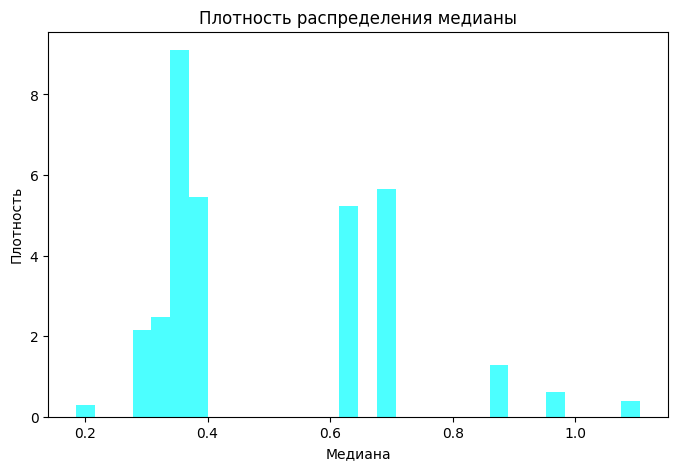

In [72]:
num_resamples = 1000

bootstrap_medians = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    median = np.median(resample)
    bootstrap_medians.append(median)

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=30, density=True, color='cyan', alpha=0.7)
plt.title('Плотность распределения медианы')
plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.show()